# Styles and Colors in Matplotlib

In [17]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

## Styles

On style sheets in Matplotlib: 
- https://matplotlib.org/users/customizing.html
- https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

Define a function that plots a number of colored circles

In [18]:
prng = np.random.RandomState(96927002)
def plot_colored_circles(nb_samples=6):
    """Plot circle patches. Adapted from 
    https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'], range(nb_samples)):
        ax.add_patch(plt.Circle(prng.uniform(low=-5, high=5, size=2),
                                radius=1.0, color=sty_dict['color']))
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    plt.show()

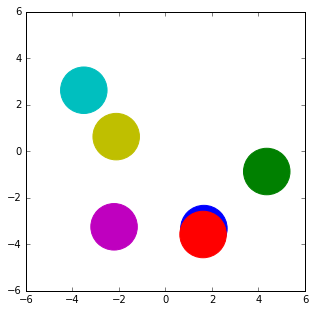

In [3]:
plot_colored_circles()

List all styles in Matplotlib

In [4]:
plt.style.available

['seaborn-pastel',
 'dark_background',
 'seaborn-dark-palette',
 'classic',
 'seaborn-talk',
 'seaborn-deep',
 'seaborn-poster',
 'seaborn-darkgrid',
 'grayscale',
 'seaborn-bright',
 'seaborn-notebook',
 'seaborn-whitegrid',
 'seaborn-colorblind',
 'ggplot',
 'seaborn-dark',
 'seaborn-white',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-muted',
 'bmh']

Change styles

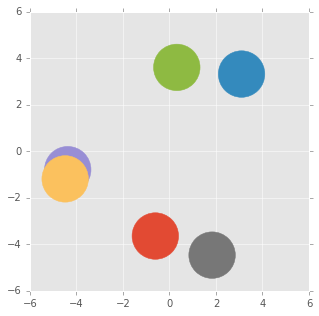

In [5]:
plt.style.use('ggplot')
plot_colored_circles()

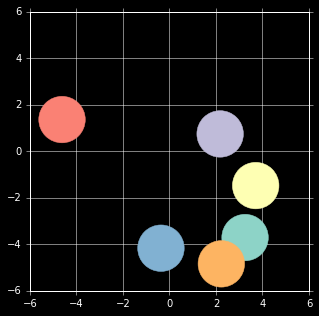

In [6]:
plt.style.use('dark_background')
plot_colored_circles()

The 'dark_background' style should not have gridlines - they are left over from the 'ggplot' style. We need to reset the style first. 

In [7]:
import warnings
import matplotlib.cbook

def change_style(style_name='default'):
    warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation) # To suppres deprecation warnings
    plt.rcParams.update(plt.rcParamsDefault) # To reset the style
    # To restart the inline backend 
    %matplotlib inline                       
    plt.style.use(style_name)

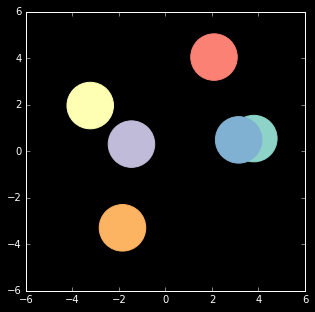

In [8]:
change_style('dark_background')
plot_colored_circles()

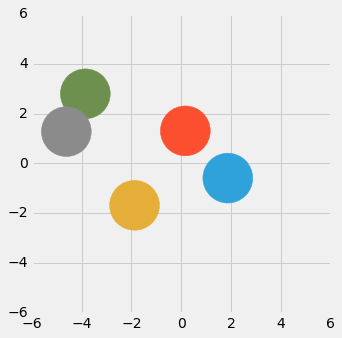

In [9]:
change_style('fivethirtyeight')
plot_colored_circles()

In [12]:
change_style('tableau-colorblind10')
plot_colored_circles()

OSError: 'tableau-colorblind10' not found in the style library and input is not a valid URL or path. See `style.available` for list of available styles.

## Colors

On color maps in Matplotlib:
- https://matplotlib.org/users/colormaps.html

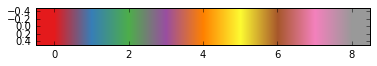

In [20]:
# Choose a categorical color map
categorical_map = plt.get_cmap('Set1')
# Plot the categorical color map
data = np.atleast_2d(np.arange(9))
plt.imshow(data, cmap=categorical_map, vmin=0, vmax=8)
plt.show()

Define categorical colorblind safe colors as in http://mkweb.bcgsc.ca/colorblind/

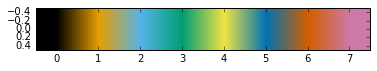

In [14]:
# List the colors
safe_colors = [
    (  0,   0,   0),
    (230, 159,   0),
    ( 86, 180, 233),
    (  0, 158, 115),
    (240, 228,  66),
    (  0, 114, 178),
    (213,  94,   0),
    (204, 121, 167),
]
# Normalize [0, 255]^3 RGB space to [0, 1]^3
for i in range(len(safe_colors)):    
    r, g, b = safe_colors[i]    
    safe_colors[i] = (r / 255., g / 255., b / 255.)  
# Create a listed color map
safe_map = ListedColormap(safe_colors, name='colorblind-safe')
safe_num = len(safe_colors)
# Plot the colorblind safe color map
data = np.atleast_2d(np.arange(safe_num))
plt.imshow(data, cmap=safe_map, vmin=0, vmax=safe_num)
plt.show()

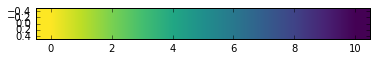

In [21]:
# Choose a sequential color map
sequential_map = plt.get_cmap('viridis_r')
# Plot the sequential color map
data = np.atleast_2d(np.arange(11))
plt.imshow(data, cmap=sequential_map, vmin=0, vmax=10)
plt.show()

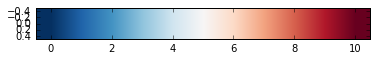

In [16]:
# Choose a diverging color map
diverging_map = plt.get_cmap('RdBu_r')
# Plot the diverging color map
data = np.atleast_2d(np.arange(11))
plt.imshow(data, cmap=diverging_map, vmin=0, vmax=10)
plt.show()